## EDA y sisteme de recomendación de ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
df = pd.read_csv("Datasets/Movies_ETL.csv", low_memory=False)

In [3]:
df.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,release_year,return,collection_name,IdCollect,director_name,actors
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,...,NaN,Toy Story,7.7,5415.0,1995,12.451801,Toy Story Collection,10194.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,NaN,NaN,['Joe Johnston'],"['Robin Williams', 'Jonathan Hyde', 'David Ala..."


In [4]:
df.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'return',
       'collection_name', 'IdCollect', 'director_name', 'actors'],
      dtype='object')

In [5]:
df.drop("id", axis="columns",inplace=True)

In [6]:
df.drop("overview", axis ="columns",inplace=True)
df.drop("tagline", axis ="columns",inplace=True)

In [7]:
df.drop("IdCollect",axis ="columns",inplace=True)
df.drop("release_year",axis ="columns",inplace=True)
df.drop("director_name",axis ="columns",inplace=True)
df.drop("actors",axis ="columns",inplace=True)

In [8]:
df.drop("vote_count",axis = "columns",inplace=True)

In [9]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"] =(df["release_date"].dt.year // 10) *10

In [10]:
df["popularity"] = pd.qcut(df["popularity"], q=7, labels=["Muy Malo", "Malo", "Normal", "Bueno", "Muy Bueno","Excelente","Hit"])
df["vote_average"] = pd.qcut(df["vote_average"], q=7, labels=["Muy Malo", "Malo", "Normal", "Bueno", "Muy Bueno","Excelente","Hit"])
df["runtime"] = pd.qcut(df["runtime"], q=6, labels=["Muy Poco","Poco","Normal","Mas de lo Normal","Largo", "Muy Largo"])
df["revenue"] = pd.qcut(df["revenue"].rank(method="first"), q=6, labels=["Muy poco", "Poco","Lo esperado","Mas de lo esperado","Mucho mas de lo esperado", "Record"])

In [11]:
df["popularity"] = pd.Categorical(df["popularity"]).codes
df["vote_average"] = pd.Categorical(df["vote_average"]).codes
df["runtime"] =  pd.Categorical(df["runtime"]).codes
df["revenue"] = pd.Categorical(df["revenue"]).codes

In [12]:
df["genres"] = pd.Categorical(df["genres"]).codes
df["original_language"] = pd.Categorical(df["original_language"]).codes
df["production_companies"] = pd.Categorical(df["production_companies"]).codes
df["production_countries"] = pd.Categorical(df["production_countries"]).codes
df["spoken_languages"] = pd.Categorical(df["spoken_languages"]).codes
df["status"] = pd.Categorical(df["status"]).codes
df["collection_name"] = pd.Categorical(df["collection_name"]).codes

In [13]:
df.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,return,collection_name
0,30000000,1090,17,6,15264,2370,1990,5,1,906,4,Toy Story,6,12.451801,1546
1,65000000,941,17,6,19691,2370,1990,5,4,626,4,Jumanji,5,4.043035,-1
2,0,3316,17,6,21747,2370,1990,0,3,906,4,Grumpier Old Men,4,0.000000,529
3,16000000,1398,17,5,20124,2370,1990,5,5,906,4,Waiting to Exhale,3,5.090760,-1
4,0,1599,17,6,16904,2370,1990,5,4,906,4,Father of the Bride Part II,2,0.000000,434


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data_num = df.corr()

C:\Users\mateo\AppData\Local\Temp\ipykernel_2728\33127072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_num = df.corr()


In [16]:
data_num

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,return,collection_name
budget,1.000000,-0.090830,-0.071826,0.322983,0.139603,0.034818,0.130471,0.286337,0.195720,-0.010030,0.007630,0.055107,-0.002135,0.009495
genres,-0.090830,1.000000,-0.008143,0.032959,0.064604,-0.049483,-0.003825,-0.030251,0.051737,0.051354,0.020524,-0.006352,0.002899,0.006671
original_language,-0.071826,-0.008143,1.000000,-0.090149,-0.012585,-0.213503,0.048194,0.024554,0.088112,0.361371,0.003880,0.096672,-0.001383,-0.024739
popularity,0.322983,0.032959,-0.090149,1.000000,0.285926,-0.013979,0.197662,0.112756,0.303926,0.100073,0.028709,0.220906,0.008615,0.039497
production_companies,0.139603,0.064604,-0.012585,0.285926,1.000000,-0.035701,-0.169668,0.036713,0.123734,0.118172,0.033454,0.081597,0.007601,0.023658
production_countries,0.034818,-0.049483,-0.213503,-0.013979,-0.035701,1.000000,-0.142932,0.004250,-0.127199,-0.217606,-0.013050,-0.107453,0.004419,0.012550
release_date,0.130471,-0.003825,0.048194,0.197662,-0.169668,-0.142932,1.000000,0.245053,0.104982,0.033721,-0.030730,-0.019926,-0.005467,-0.024511
revenue,0.286337,-0.030251,0.024554,0.112756,0.036713,0.004250,0.245053,1.000000,0.025187,0.017495,-0.013612,-0.014924,0.012925,-0.016189
runtime,0.195720,0.051737,0.088112,0.303926,0.123734,-0.127199,0.104982,0.025187,1.000000,0.160052,0.022509,0.190343,0.000216,0.009166
spoken_languages,-0.010030,0.051354,0.361371,0.100073,0.118172,-0.217606,0.033721,0.017495,0.160052,1.000000,0.031653,0.111222,-0.004334,-0.002969


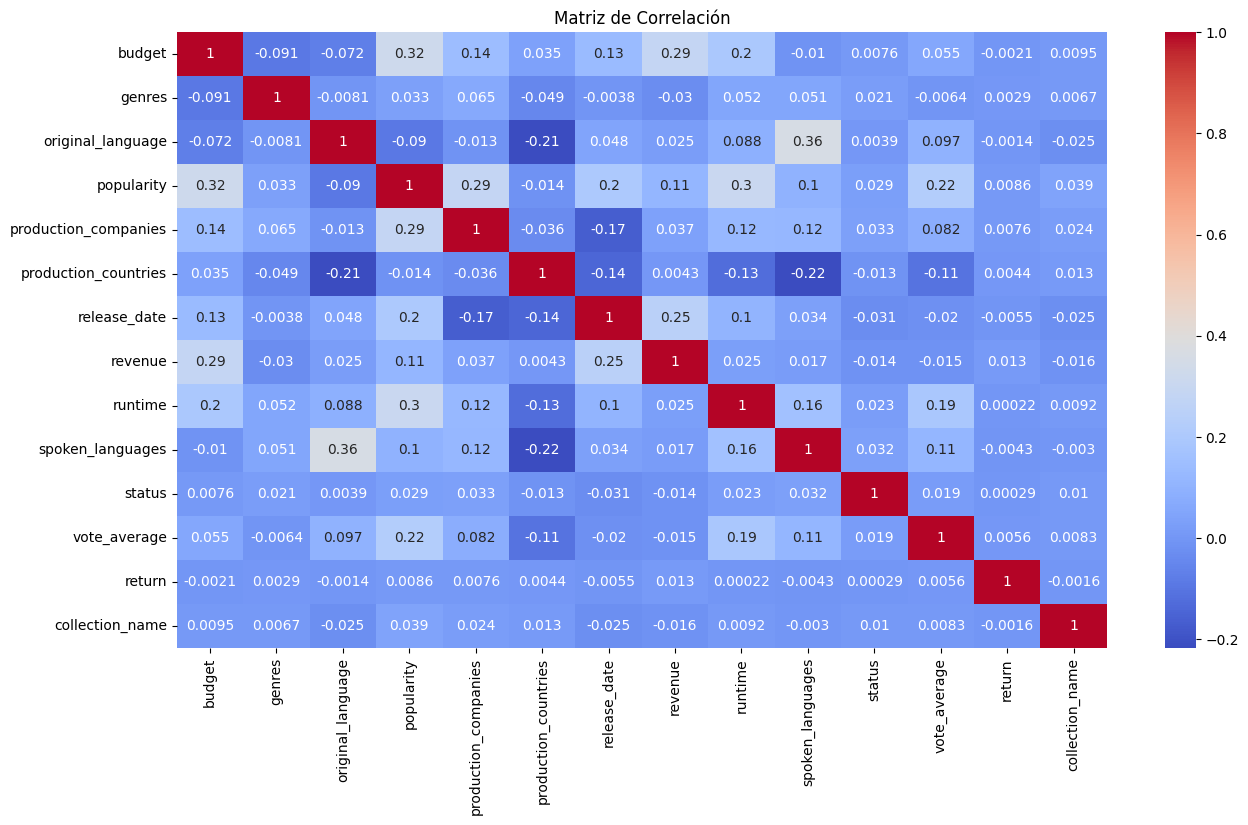

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num,annot =True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [18]:
df.drop("budget",axis="columns",inplace=True)
df.drop("revenue",axis="columns",inplace=True)
df.drop("production_countries",axis="columns",inplace=True)
df.drop("spoken_languages",axis="columns",inplace=True)

In [19]:
data_num = df.corr()

C:\Users\mateo\AppData\Local\Temp\ipykernel_2728\33127072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_num = df.corr()


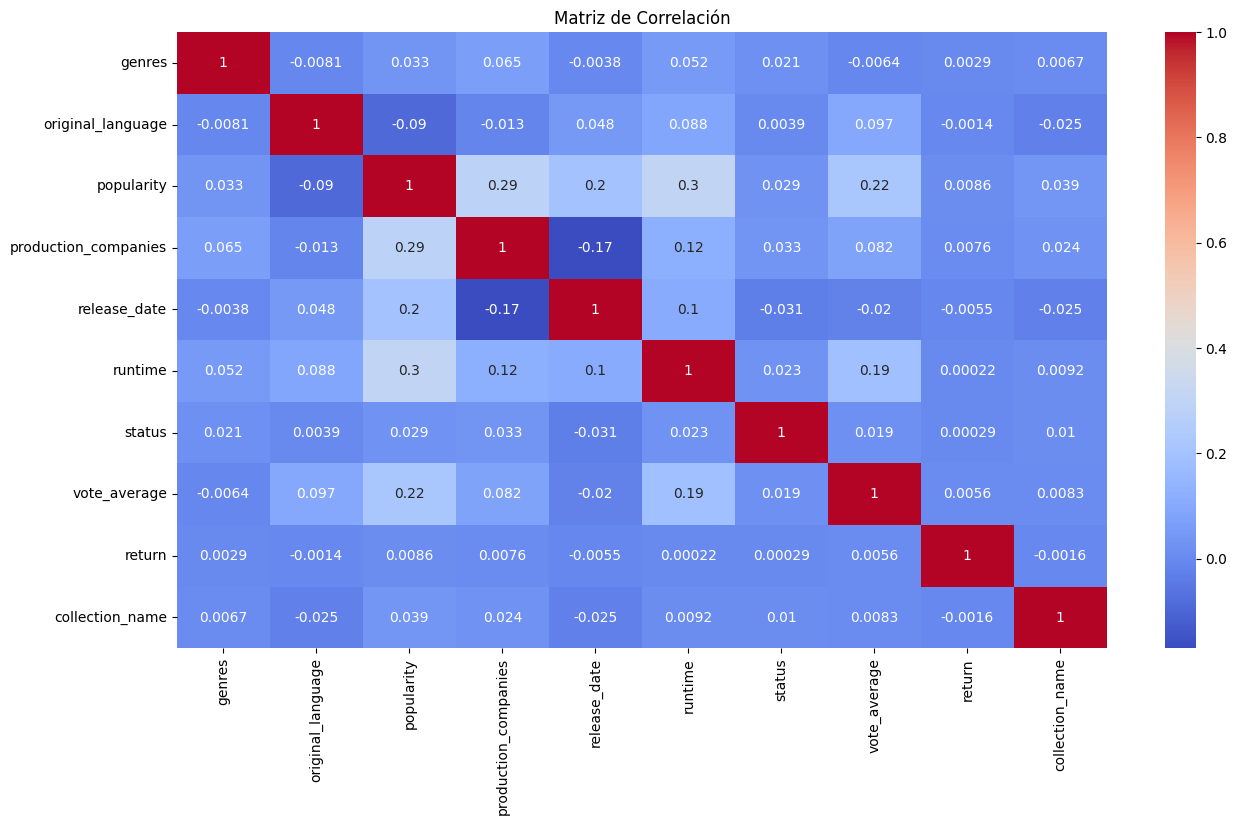

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num,annot =True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [21]:
from wordcloud import WordCloud

In [22]:
wordcloud = WordCloud(width = 600, height = 300, background_color = "black").generate(' '.join(df["title"]))

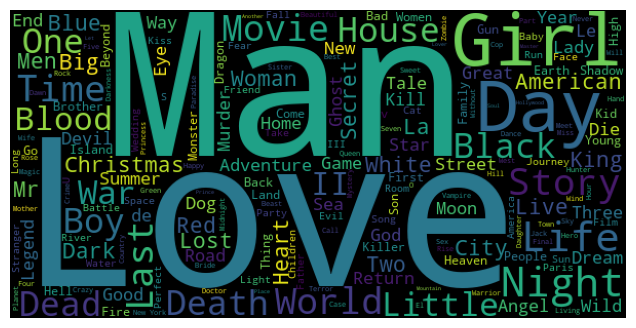

In [23]:
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
titulos_repetidos = df["title"].value_counts()
titulos_repetidos

Blackout               13
Cinderella             11
Alice in Wonderland     9
Hamlet                  9
The Promise             8
                       ..
Svengali                1
Lampaansyöjät           1
Animal Kingdom          1
The Exploding Girl      1
Queerama                1
Name: title, Length: 42195, dtype: int64

In [25]:
titulos_duplicados = titulos_repetidos[titulos_repetidos > 1]
titulos_duplicados

Blackout               13
Cinderella             11
Alice in Wonderland     9
Hamlet                  9
The Promise             8
                       ..
Lamerica                2
Buried Alive            2
The Hunting Party       2
The Rebel               2
Breakthrough            2
Name: title, Length: 2339, dtype: int64

In [26]:
cantidad_titulos_repetidos = len(titulos_duplicados)
cantidad_titulos_repetidos

2339

In [27]:
df.drop_duplicates(subset="title", keep="first", inplace=True)

In [28]:
df["title"].value_counts()

Toy Story                      1
Bulldog Drummond at Bay        1
Bulldog Drummond in Africa     1
Bulldog Drummond Comes Back    1
Bulldog Drummond's Revenge     1
                              ..
Big Pun: The Legacy            1
Agent Red                      1
The Last Patrol                1
The Girl in the Park           1
Queerama                       1
Name: title, Length: 42195, dtype: int64

In [29]:
df

,genres,original_language,popularity,production_companies,release_date,runtime,status,title,vote_average,return,collection_name
0,1090,17,6,15264,1990,1,4,Toy Story,6,12.451801,1546
1,941,17,6,19691,1990,4,4,Jumanji,5,4.043035,-1
2,3316,17,6,21747,1990,3,4,Grumpier Old Men,4,0.000000,529
3,1398,17,5,20124,1990,5,4,Waiting to Exhale,3,5.090760,-1
4,1599,17,6,16904,1990,4,4,Father of the Bride Part II,2,0.000000,434
...,...,...,...,...,...,...,...,...,...,...,...
45444,3032,17,1,13236,2000,0,4,The Burkittsville 7,5,0.000000,-1
45445,3561,17,2,4773,1990,1,4,Caged Heat 3000,0,0.000000,-1
45447,2384,79,1,17550,2010,5,4,Century of Birthing,6,0.000000,-1
45449,-1,17,0,22271,1910,1,4,Satan Triumphant,0,0.000000,-1


In [30]:
df.to_csv("Datasets/Movies_ML.csv", index=False)

# Sistema de recomendación

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
n = 6000
datos = df.head(n)

In [35]:
x = datos[["genres", "original_language", "popularity", "production_companies", "release_date", "runtime", "status", "vote_average", "return", "collection_name"]]

In [37]:
matris = cosine_similarity(x)

In [38]:
matris

array([[1.        , 0.9943319 , 0.99321578, ..., 0.98789673, 0.99428886,
        0.99333537],
       [0.9943319 , 1.        , 0.99435055, ..., 0.98871227, 0.99980006,
        0.99461002],
       [0.99321578, 0.99435055, 1.        , ..., 0.99697376, 0.9960764 ,
        0.99919061],
       ...,
       [0.98789673, 0.98871227, 0.99697376, ..., 1.        , 0.99051665,
        0.99874277],
       [0.99428886, 0.99980006, 0.9960764 , ..., 0.99051665, 1.        ,
        0.99591693],
       [0.99333537, 0.99461002, 0.99919061, ..., 0.99874277, 0.99591693,
        1.        ]])

In [46]:
def get_recomendacion(titulo):
    top_n=5
    indice_titulo = datos[datos["title"] == titulo].index[0]
    resultado_matris = matris[indice_titulo]
    indices = resultado_matris.argsort()[-top_n-1:-1][::-1]
    recomendacion = datos.loc[indices,"title"]
    recomendacion = recomendacion.values.tolist()
    return{"lista recomnendada": str(recomendacion)}

In [50]:
get_recomendacion("Star Wars")

{'lista recomnendada': "['Slap Shot', 'The Conversation', 'Office Space', 'Croupier', 'The Whole Wide World']"}